In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [163]:
df=pd.read_csv("Ad Click Data.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [164]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [165]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [166]:
df1=df.drop(['Ad Topic Line', 'City', 'Country','Timestamp'],axis=1)
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0.0,0
1,80.23,31,68441.85,193.77,1.0,0
2,69.47,26,59785.94,236.50,0.0,0
3,74.15,29,54806.18,245.89,1.0,0
4,68.37,35,73889.99,225.58,0.0,0


In [167]:
df1.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Clicked on Ad                0
dtype: int64

In [168]:
df1.shape

(1000, 6)

In [169]:
df1.dropna(inplace=True)

In [170]:
df1.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.332624,0.305855,0.519289,-0.016236,-0.744252
Age,-0.332624,1.000000,-0.182689,-0.378976,-0.021827,0.491940
Area Income,0.305855,-0.182689,1.000000,0.335894,0.004772,-0.474624
Daily Internet Usage,0.519289,-0.378976,0.335894,1.000000,0.034570,-0.792469
Male,-0.016236,-0.021827,0.004772,0.034570,1.000000,-0.042305
Clicked on Ad,-0.744252,0.491940,-0.474624,-0.792469,-0.042305,1.000000


In [171]:
df1=df1.drop(['Male'],axis=1)

In [172]:
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


In [173]:
df1.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,963.000000,963.000000,963.000000,963.000000,963.000000
mean,64.829200,36.049844,55080.400457,179.716106,0.503634
std,15.892075,8.764154,13400.557838,43.867289,0.500247
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,50.600000,29.000000,47095.115000,138.615000,0.000000
50%,68.010000,35.000000,57014.840000,182.200000,1.000000
75%,78.365000,42.000000,65598.150000,218.550000,1.000000
max,91.430000,61.000000,79484.800000,267.010000,1.000000


In [174]:
df1.shape

(963, 5)

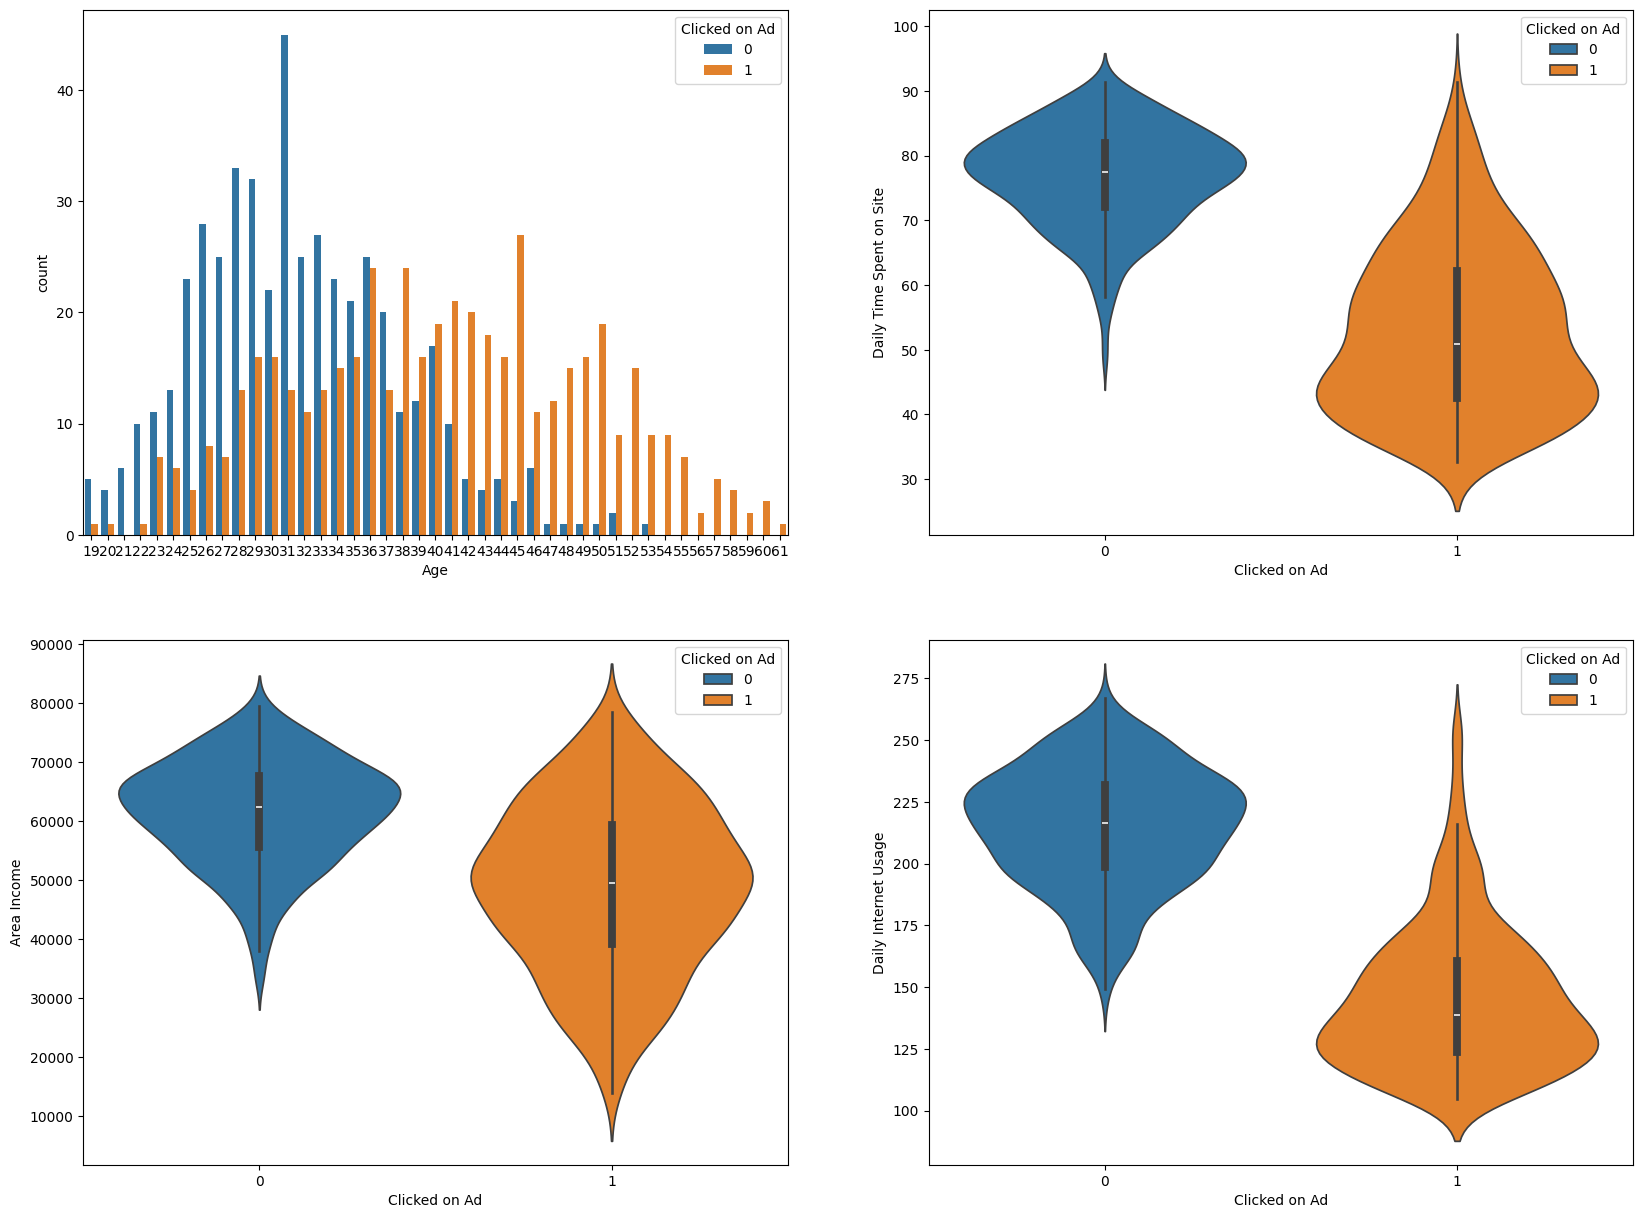

In [213]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(20,15))
ax=ax.flatten()
sns.countplot(x='Age', hue='Clicked on Ad', data=df1,ax=ax[0])
sns.violinplot(x='Clicked on Ad', y='Daily Time Spent on Site', hue='Clicked on Ad',data=df1,ax=ax[1])
sns.violinplot(x='Clicked on Ad', y='Area Income', hue='Clicked on Ad',data=df1,ax=ax[2])
sns.violinplot(x='Clicked on Ad', y='Daily Internet Usage', hue='Clicked on Ad',data=df1,ax=ax[3])
plt.show()

In [199]:
X = df1.drop('Clicked on Ad', axis=1)
y = df1['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8704663212435233
Confusion Matrix:
 [[83  7]
 [18 85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        90
           1       0.92      0.83      0.87       103

    accuracy                           0.87       193
   macro avg       0.87      0.87      0.87       193
weighted avg       0.88      0.87      0.87       193

